In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
file = "../data/clean_hockey_data.csv"
nhl_df = pd.read_csv(file)

In [3]:
nhl_df.head()

,Unnamed: 0,Rk,Player,ID,Age,Pos,Tm,GP,G,A,...,HART,Votes,Season,G/60min,A/60min,PTS/60min,HIT/60min,BLK/60min,PIM/60min,S/60min
0,0,1,Connor McDavid,mcdavco01,20,C,EDM,82.0,30,70,...,1,1604,2017,1.038661,2.423543,3.462204,1.177149,1.004039,0.900173,8.690133
1,1,2,Sidney Crosby,crosbsi01,29,C,PIT,75.0,44,45,...,0,1104,2017,1.770624,1.810865,3.581489,3.219316,1.086519,0.965795,10.261569
2,2,3,Patrick Kane,kanepa01,28,RW,CHI,82.0,34,55,...,0,206,2017,1.163056,1.881414,3.044470,0.957811,0.513113,1.094641,9.988597
3,3,4,Nicklas Backstrom,backsni02,29,C,WSH,82.0,23,63,...,0,60,2017,0.921844,2.525050,3.446894,1.803607,1.322645,1.523046,6.492986
4,4,5,Nikita Kucherov,kucheni01,23,RW,TBL,74.0,40,45,...,0,119,2017,1.668985,1.877608,3.546592,1.251739,0.834492,1.585535,10.264256


In [4]:
# Pass in a df and a category, and the function will produce a new df grouped by that category and displaying 
# the average (or median) of each category
def groupby_avg(df, category):
    # Groups the df by a category
    temp_df = df.groupby([category])

    # Calculates the average stats for each group
    avg_goals = temp_df["G/60min"].mean()
    avg_assists = temp_df["A/60min"].mean()
    avg_pts = temp_df["PTS/60min"].mean()
    avg_hits = temp_df["HIT/60min"].mean()
    avg_blocks = temp_df["BLK/60min"].mean()
    avg_shootperc = temp_df["S_percent"].mean()
    avg_s = temp_df["S/60min"].mean()
    avg_pim = temp_df["PIM/60min"].mean()
    count = temp_df["Player"].count()

    # Builds the new df
    new_df = pd.DataFrame({
        "Avg G/60min" : avg_goals,
        "Avg A/60min" : avg_assists,
        "Avg PTS/60min" : avg_pts,
        "Avg HIT/60min" : avg_hits,
        "Avg BLK/60min" : avg_blocks,
        "Avg S_percent" : avg_shootperc,
        "Avg S/60min" : avg_s,
        "Avg PIM/60min" : avg_pim,
        "Num Players" : count
    })
    return new_df


def groupby_median(df, category):
    temp_df = df.groupby([category])

    med_goals = temp_df["G/60min"].median()
    med_assists = temp_df["A/60min"].median()
    med_pts = temp_df["PTS/60min"].median()
    med_hits = temp_df["HIT/60min"].median()
    med_blocks = temp_df["BLK/60min"].median()
    med_shhotperc = temp_df["S_percent"].median()
    med_pim = temp_df["PIM/60min"].median()
    count = temp_df["Player"].count()


    new_df = pd.DataFrame({
        "Med G/60min" : med_goals,
        "Med A/60min" : med_assists,
        "Med PTS/60min" : med_pts,
        "Med HIT/60min" : med_hits,
        "Med BLK/60min" : med_blocks,
        "Med PIM/60min" : med_pim,
        "Num Players" : count
    })
    return new_df

In [5]:
# Df grouping by 2 categories
def multi_groupby_med(df, category1, category2):
    temp_df = df.groupby([category1, category2])

    med_goals = temp_df["G/60min"].median()
    med_assists = temp_df["A/60min"].median()
    med_pts = temp_df["PTS/60min"].median()
    med_hits = temp_df["HIT/60min"].median()
    med_blocks = temp_df["BLK/60min"].median()
    med_pim = temp_df["PIM/60min"].median()
    count = temp_df["Age"].count()

    new_df = pd.DataFrame({
        "Med G/60min" : med_goals,
        "Med A/60min" : med_assists,
        "Med PTS/60min" : med_pts,
        "Med HIT/60min" : med_hits,
        "Med BLK/60min" : med_blocks,
        "Med PIM/60min" : med_pim,
        "Num Players" : count
    })
    return new_df

def multi_groupby_avg(df, category1, category2):
    temp_df = df.groupby([category1, category2])

    avg_goals = temp_df["G/60min"].mean()
    avg_assists = temp_df["A/60min"].mean()
    avg_pts = temp_df["PTS/60min"].mean()
    avg_hits = temp_df["HIT/60min"].mean()
    avg_blocks = temp_df["BLK/60min"].mean()
    avg_pim = temp_df["PIM/60min"].mean()
    avg_s = temp_df["S/60min"].mean()
    avg_shootperc = temp_df["S_percent"].mean()
    count = temp_df["Age"].count()
    avg_gp = temp_df["GP"].mean()

    new_df = pd.DataFrame({
        "Avg G/60min" : avg_goals,
        "Avg A/60min" : avg_assists,
        "Avg PTS/60min" : avg_pts,
        "Avg HIT/60min" : avg_hits,
        "Avg BLK/60min" : avg_blocks,
        "Avg PIM/60min" : avg_pim,
        "Avg S/60min" : avg_s,
        "Avg S_percent" : avg_shootperc,
        "Avg GP" : avg_gp, 
        "Num Players" : count
    })
    return new_df

In [6]:
def seasonyears_filter(df, years_list):
    new_df = df[df.Season.isin(years_list)]
    return new_df

# Groups a df into 3 sets of 3 years
def three_year_group(df):
    years = [2004, 2005, 2006, 2009, 2010, 2011, 2016, 2017, 2018]
    new_df = df[df.Season.isin(years)]

    bins = [2004, 2006, 2011, 2018]
    groups = ["2004-06", "2009-11", "2016-18"]
    new_df["Season_group"] = pd.cut(new_df["Season"], bins, labels=groups, include_lowest=True)
    # grouped_df = multi_groupby_avg(new_df, "Age", "Season_group")
    return new_df

# dataframes to be moved to database

In [7]:
complete_nhl_df = nhl_df
complete_nhl_df.head()

,Unnamed: 0,Rk,Player,ID,Age,Pos,Tm,GP,G,A,...,HART,Votes,Season,G/60min,A/60min,PTS/60min,HIT/60min,BLK/60min,PIM/60min,S/60min
0,0,1,Connor McDavid,mcdavco01,20,C,EDM,82.0,30,70,...,1,1604,2017,1.038661,2.423543,3.462204,1.177149,1.004039,0.900173,8.690133
1,1,2,Sidney Crosby,crosbsi01,29,C,PIT,75.0,44,45,...,0,1104,2017,1.770624,1.810865,3.581489,3.219316,1.086519,0.965795,10.261569
2,2,3,Patrick Kane,kanepa01,28,RW,CHI,82.0,34,55,...,0,206,2017,1.163056,1.881414,3.044470,0.957811,0.513113,1.094641,9.988597
3,3,4,Nicklas Backstrom,backsni02,29,C,WSH,82.0,23,63,...,0,60,2017,0.921844,2.525050,3.446894,1.803607,1.322645,1.523046,6.492986
4,4,5,Nikita Kucherov,kucheni01,23,RW,TBL,74.0,40,45,...,0,119,2017,1.668985,1.877608,3.546592,1.251739,0.834492,1.585535,10.264256


In [8]:
age_df = groupby_avg(complete_nhl_df, "Age")
age_df.head(10)

,Avg G/60min,Avg A/60min,Avg PTS/60min,Avg HIT/60min,Avg BLK/60min,Avg S_percent,Avg S/60min,Avg PIM/60min,Num Players
Age,,,,,,,,,
18,0.824067,1.148905,1.972972,2.490490,1.401981,10.941667,7.343056,1.739567,24
19,0.616434,1.000604,1.617038,3.519958,1.890612,8.770732,6.572784,1.736700,123
20,0.673296,0.995643,1.668939,3.063742,1.597840,9.348246,6.738494,1.977292,228
21,0.613062,0.951827,1.564889,3.575405,1.734297,8.644836,6.527488,2.310811,426
22,0.589820,0.928056,1.517876,3.951092,1.929304,8.447611,6.426348,2.505728,565
23,0.569432,0.895898,1.465330,3.656526,1.872470,8.423410,6.261711,2.865571,786
24,0.570625,0.864058,1.434683,4.310944,2.117441,8.311407,6.299616,3.135397,789
25,0.549905,0.876479,1.426384,4.324902,2.091699,8.060736,6.174470,3.254219,815
26,0.539137,0.857603,1.396740,4.329100,2.114965,8.149451,6.007133,3.566326,819


In [9]:
season_df = groupby_avg(complete_nhl_df, "Season")
season_df.head()

,Avg G/60min,Avg A/60min,Avg PTS/60min,Avg HIT/60min,Avg BLK/60min,Avg S_percent,Avg S/60min,Avg PIM/60min,Num Players
Season,,,,,,,,,
2004,0.514478,0.828224,1.342702,0.000000,0.000000,8.308504,5.705203,4.328171,635
2006,0.609734,1.009904,1.619638,0.000000,0.000000,8.911111,6.174615,4.131063,630
2007,0.576399,0.966838,1.543237,0.000000,0.000000,8.576645,6.090347,3.631224,608
2008,0.534129,0.888737,1.422866,4.500742,2.339818,8.137239,5.935895,3.691121,623
2009,0.569995,0.951735,1.521730,2.477101,1.288872,8.465959,6.098845,3.611024,1225


In [10]:
# Data split by position
forwards_data = nhl_df[(nhl_df["Pos"] != "D") & (nhl_df["Age"] >= 20)]
defensemen_data = nhl_df[(nhl_df["Pos"] == "D") & (nhl_df["Age"] >= 20)]

# Data for only younger players. Exlcuding 18/19 yr olds because of how few there are and their tendency to be superstars
young_df = forwards_data[(forwards_data["Age"] <= 22) & (forwards_data["Age"] >= 20)]

#
ssn18_df = forwards_data[forwards_data["Season"] == 2018]
ssn04_df = forwards_data[forwards_data["Season"] == 24]

# Isolate 2004, 2011, 2018
season_split_df = forwards_data[(forwards_data["Season"] == 2004) | (forwards_data["Season"] == 2011) | (forwards_data["Season"] == 2018)]

# Points by Age

Text(0.5, 1.0, 'Forwards - Age 20-22')

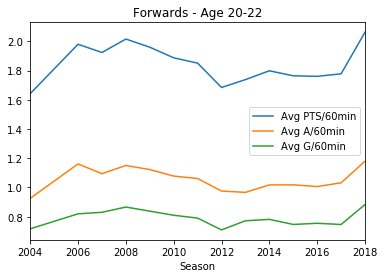

In [11]:
ax = plt.gca()

youth_by_season_df = groupby_avg(young_df, "Season")
youth_by_season_df.plot(kind="line", y = "Avg PTS/60min", ax=ax)
youth_by_season_df.plot(kind="line", y = "Avg A/60min", ax=ax)
youth_by_season_df.plot(kind="line", y = "Avg G/60min", ax=ax)
plt.title("Forwards - Age 20-22")

In [12]:
youth_by_season_df.head(20)

,Avg G/60min,Avg A/60min,Avg PTS/60min,Avg HIT/60min,Avg BLK/60min,Avg S_percent,Avg S/60min,Avg PIM/60min,Num Players
Season,,,,,,,,,
2004,0.716873,0.925508,1.642380,0.000000,0.000000,9.880488,7.176140,3.270396,41
2006,0.819463,1.161118,1.980581,0.000000,0.000000,9.994828,7.811427,3.557506,58
2007,0.829930,1.094267,1.924196,0.000000,0.000000,10.268000,8.063818,4.058112,50
2008,0.865907,1.150347,2.016254,5.419241,1.550164,11.900000,7.306218,3.331272,50
2009,0.837911,1.122663,1.960574,2.993318,0.801755,10.957009,7.647825,3.570421,107
2010,0.809645,1.078014,1.887659,4.939490,1.451887,10.176471,7.822409,2.048372,51
2011,0.790305,1.061121,1.851426,4.862991,1.579402,10.631373,7.426377,2.517583,51
2012,0.709307,0.975400,1.684707,5.372757,1.766649,9.490000,7.279142,2.421796,60
2013,0.771999,0.966482,1.738480,5.109541,1.618462,10.908621,7.144081,1.996661,58


# Forwards

Text(0.5, 1.0, 'Forwards - PTS')

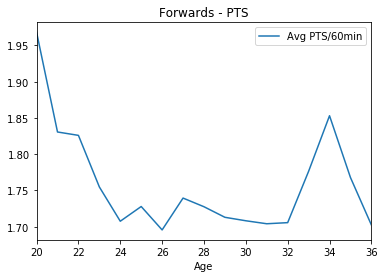

In [13]:
age_groupings_df = groupby_avg(forwards_data, "Age")
age_groupings_df.plot(kind="line", y = "Avg PTS/60min")
plt.title("Forwards - PTS")

Text(0.5, 1.0, 'Forwards - Shoot %')

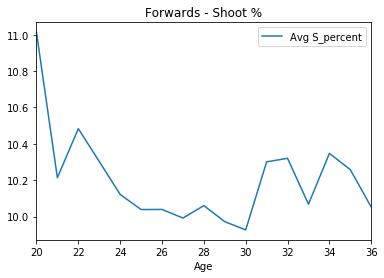

In [14]:
age_groupings_df = groupby_avg(forwards_data, "Age")
age_groupings_df.plot(kind="line", y = "Avg S_percent")
plt.title("Forwards - Shoot %")

Text(0.5, 1.0, 'Forwards - Penalty Minutes')

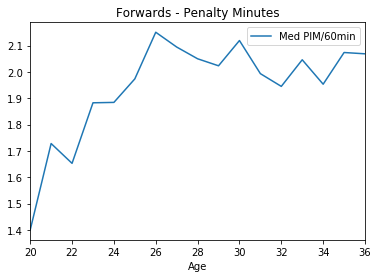

In [15]:
age_groupings_df = groupby_median(forwards_data, "Age")
age_groupings_df.plot(kind="line", y = "Med PIM/60min")
plt.title("Forwards - Penalty Minutes")

# Defensemen

Text(0.5, 1.0, 'Defensemen - PTS')

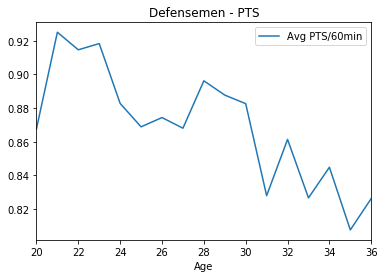

In [16]:
d_age_groupings_df = groupby_avg(defensemen_data, "Age")
d_age_groupings_df.plot(kind="line", y = "Avg PTS/60min")
plt.title("Defensemen - PTS")

Text(0.5, 1.0, 'Defensemen - Hits')

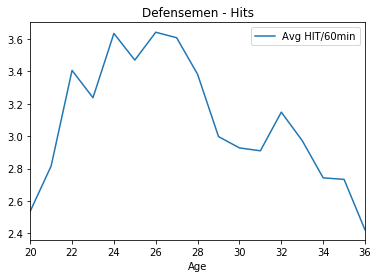

In [17]:
d_age_groupings_df = groupby_avg(defensemen_data, "Age")
d_age_groupings_df.plot(kind="line", y = "Avg HIT/60min")
plt.title("Defensemen - Hits")

Text(0.5, 1.0, 'Defensemen - Median Penalty Minutes')

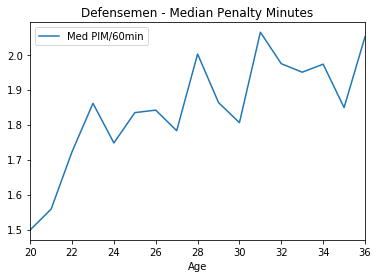

In [18]:
d_age_groupings_df = groupby_median(defensemen_data, "Age")
d_age_groupings_df.plot(kind="line", y = "Med PIM/60min")
plt.title("Defensemen - Median Penalty Minutes")

# Grouping by Age and Season

Text(0.5, 1.0, 'League - PTS')

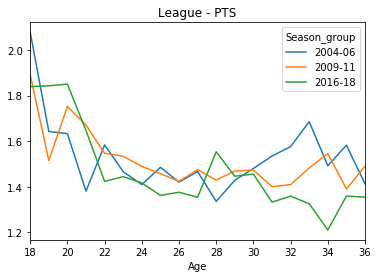

In [19]:
new_df = three_year_group(nhl_df)
new_df = multi_groupby_avg(new_df, "Age", "Season_group")
new_df.unstack("Season_group").plot(kind="line", y = "Avg PTS/60min")
plt.title("League - PTS")

Text(0.5, 1.0, 'Forwards - PTS')

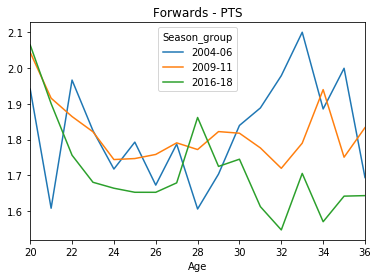

In [20]:
new_df = three_year_group(forwards_data)
new_df = multi_groupby_avg(new_df, "Age", "Season_group")
new_df.unstack("Season_group").plot(kind="line", y = "Avg PTS/60min")
plt.title("Forwards - PTS")

Text(0.5, 1.0, 'Defensemen - PTS')

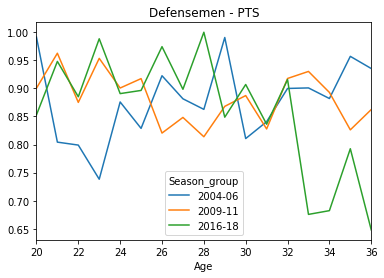

In [21]:
new_df = three_year_group(defensemen_data)
new_df = multi_groupby_avg(new_df, "Age", "Season_group")
new_df.unstack("Season_group").plot(kind="line", y = "Avg PTS/60min")
plt.title("Defensemen - PTS")

Text(0.5, 1.0, 'League - Hits')

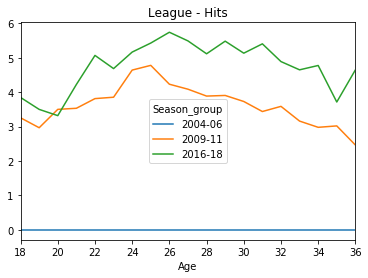

In [22]:
new_df = three_year_group(nhl_df)
new_df = multi_groupby_avg(new_df, "Age", "Season_group")
new_df.unstack("Season_group").plot(kind="line", y = "Avg HIT/60min")
plt.title("League - Hits")

Text(0.5, 1.0, 'League - Blocks')

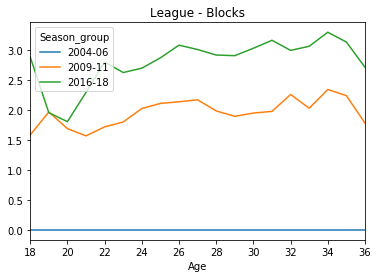

In [23]:
new_df = three_year_group(nhl_df)
new_df = multi_groupby_avg(new_df, "Age", "Season_group")
new_df.unstack("Season_group").plot(kind="line", y = "Avg BLK/60min")
plt.title("League - Blocks")

Text(0.5, 1.0, 'League - Shoot %')

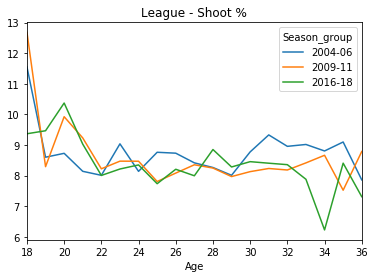

In [24]:
new_df = three_year_group(nhl_df)
new_df = multi_groupby_avg(new_df, "Age", "Season_group")
new_df.unstack("Season_group").plot(kind="line", y = "Avg S_percent")
plt.title("League - Shoot %")

Text(0.5, 1.0, 'League - Count')

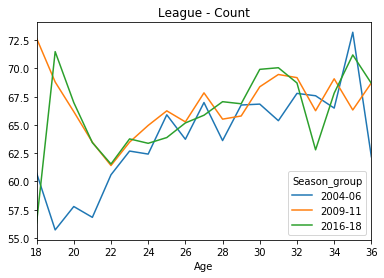

In [25]:
new_df = three_year_group(nhl_df)
new_df = multi_groupby_avg(new_df, "Age", "Season_group")
new_df.unstack("Season_group").plot(kind="line", y = "Avg GP")
plt.title("League - Count")

Text(0.5, 1.0, 'Forwards - Hits')

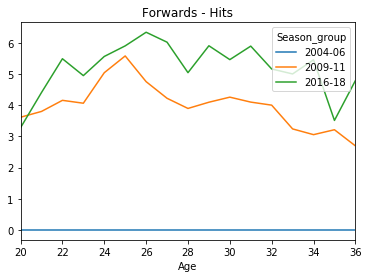

In [26]:
new_df = three_year_group(forwards_data)
new_df = multi_groupby_avg(new_df, "Age", "Season_group")
new_df.unstack("Season_group").plot(kind="line", y = "Avg HIT/60min")
plt.title("Forwards - Hits")

Text(0.5, 1.0, 'Defensemen - Hits')

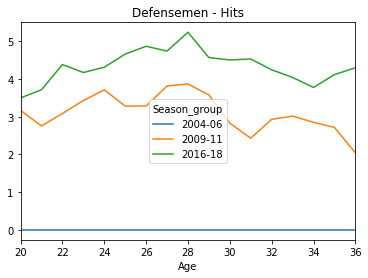

In [27]:
new_df = three_year_group(defensemen_data)
new_df = multi_groupby_avg(new_df, "Age", "Season_group")
new_df.unstack("Season_group").plot(kind="line", y = "Avg HIT/60min")
plt.title("Defensemen - Hits")

Text(0.5, 1.0, 'Forwards - Blocks')

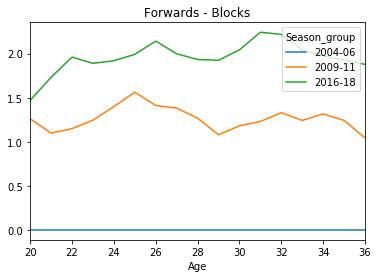

In [28]:
new_df = three_year_group(forwards_data)
new_df = multi_groupby_avg(new_df, "Age", "Season_group")
new_df.unstack("Season_group").plot(kind="line", y = "Avg BLK/60min")
plt.title("Forwards - Blocks")

# Group by ATOI

(0, 20)

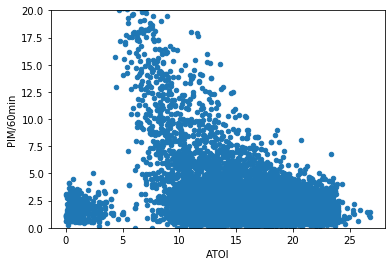

In [29]:

nhl_df.plot(kind="scatter", x = "ATOI", y = "PIM/60min")
plt.ylim(0, 20)
# Turns out there is an exclusive club of players with more career PIM than TOI


In [58]:
nhl_df["PIM/60min"].max()

82.5